Name: Rahimat Folake yusuf

Student Number: 501006487

Project Topic: Fake News Classification for UNHCR Organization using Natural Language Processing and Deep Learning in Python.

In [ ]:
#pip install nltk
import pandas as pd
import numpy as np #used to import numpy arrays
import matplotlib.pyplot as plt # for visualization
import re #Regular expression is useful for searching words in a text/document/paragraph
from nltk.corpus import stopwords #natural language toolkit, and corpus means the important content of the text and stopwords removes words that do not add value 
from nltk.stem.porter import PorterStemmer #porterstemmer: used to stem the words giving us the root word
from sklearn.feature_extraction.text import TfidfVectorizer #used to convert the text to feature vectors
from sklearn.linear_model import LogisticRegression #used to import our model Logistic regression
from sklearn.naive_bayes import MultinomialNB #used to import Naive Bayes Algorithmn
from sklearn.tree import DecisionTreeClassifier #used to import the decision tree algorithm
from sklearn.model_selection import cross_val_score 

In [2]:
#This is importing and downloading the stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahimatyusuf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Printing the stop words in english as they do not add value to our data

print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Step 1: Data Cleaning:

In [4]:
#Loading the dataset to a pandas DataFrame
df = pd.read_csv('/Users/rahimatyusuf/Documents/Data Analytics/Ryerson/CMTH 820/Untitled Folder/train.csv')

In [5]:
#To display the numbers of rows

df.shape

(20800, 5)

In [6]:
#To display the first 5 rows
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
#To display the bottom 5 rows
df.tail(5) 

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [8]:
#Data Type
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [9]:
#Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [10]:
#Find missing values in the dataset

print(df.isnull().sum())


id           0
title      558
author    1957
text        39
label        0
dtype: int64


1    10413
0    10387
Name: label, dtype: int64

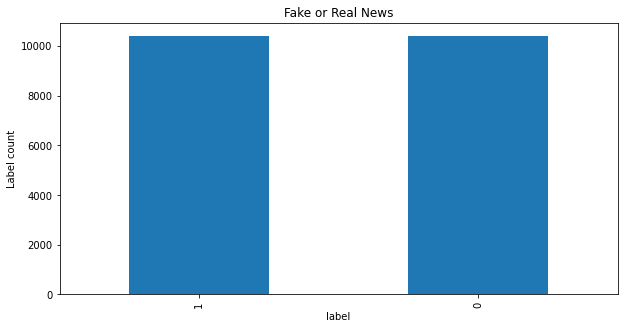

In [17]:
#Data Visulization of the attribute Label to detect balance dataset

df.label.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Fake or Real News")
plt.ylabel('Label count')
plt.xlabel('label');
df.label.value_counts()

In [19]:
#since we have a large dataset that are missing, we would use the imputation method to replace the nullstrings

df = df.fillna('')


In [20]:
#Dependent Variable Selection
#Combining the attribute 'title' and 'author' to yield great accuracy result, the column 'Text' will not be used as it's quiet large and would not yield the best results.

#Merging the author name and the title attibute
df['content'] = df['author']+' '+df['title']

#The selected dependent variable 'content' and 'label', would be used to make predictions.
print(df['content'])


0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [22]:
#Separating the data with the Label attribute.
#dropping the label attribute.
#KB: column = axis (1) and rows = axis (0) is for rows

X = df.drop(columns='label', axis=1)  
Y = df['label']     # Y=Label Data

In [23]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Step 2: Stemming procedure 

Stemming is the process of reducing a word to its root word, this would remove the prefix and suffix

Example:
Actor, actress, acting ----> act 

In [29]:
p_stem = PorterStemmer()

In [30]:
#To create a function called stemming on content(input value)
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) #using reg. exp. subtitute to remove everything that is not alphabet in content column.(all numbers and puntuations would be removed)
    stemmed_content = stemmed_content.lower() #convert all letters into lowercase letters
    stemmed_content = stemmed_content.split() #split the words and convert to a list
    #stemming by removing the stopwords as downloaded previously.
    stemmed_content = [p_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content) #joining all the words together
    return stemmed_content #returns result after
    

In [31]:
#Applying the stemming on the content column
df['content'] = df['content'].apply(stemming)

In [38]:
print(df['content'])

X= df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [39]:
#separating the data and label

X = df['content'].values
Y = df['label'].values

print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


In [40]:
Y.shape

(20800,)

Step 3: Vectorization

Converts all the text to numbers using vectorizer function tfidfvectorizer tfidt = term frequency and idf = inverse document frequency


In [41]:
#converting the textual data to numerical data

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

data = vectorizer.transform(X)

In [42]:
print(data)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Step 4: Cross Validation with K Fold data split

In [43]:
#Data Splitting using cross validation K fold
#splitting the Dataset into training and testing data

from sklearn.model_selection import KFold
kf3 = KFold(n_splits=3)
kf5 = KFold(n_splits=5)

Step 5: Training the Model

Training Algorithmn Model using both KFold N=3 and N=5 to compare the results.

After comparism, selected Fold is N=5

In [44]:
#Definining a function to define the model

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [45]:
#Data Cross validation and Model Training using KFold n3

score_logistic_regression3 =[]
scores_Naive_Bayes3 = []
scores_Decision_tree3 = []

for train_index, test_index in kf3.split(data):
    X_train, X_test, y_train, y_test = data[train_index], data[test_index], \
                                        Y[train_index], Y[test_index]
    score_logistic_regression3.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_Naive_Bayes3.append(get_score(MultinomialNB(), X_train, X_test, y_train, y_test))
    scores_Decision_tree3.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    

In [46]:
#Model Training using KFold n5

score_logistic_regression5 =[]
scores_Naive_Bayes5 = []
scores_Decision_tree5 = []

for train_index, test_index in kf5.split(data):
    X_train, X_test, y_train, y_test = data[train_index], data[test_index], \
                                        Y[train_index], Y[test_index]
    score_logistic_regression5.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_Naive_Bayes5.append(get_score(MultinomialNB(), X_train, X_test, y_train, y_test))
    scores_Decision_tree5.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    


Algorithmn 1: Logistic Regression Model

In [54]:
#1. 
score_logistic_regression3
print ('K-fold = 3 Iterations\n', score_logistic_regression3)
print ('Logistic Regression prediction for Kfold n=3 :',np.mean(score_logistic_regression3))

print('\n')

#2. 
score_logistic_regression5
print ('K-fold = 5 Iterations\n', score_logistic_regression5)
print ('Logistic Regression prediction for Kfold n=5 :', np.mean(score_logistic_regression5))

print('\n')

#3.Selected fold is N=5
DT1 = cross_val_score(LogisticRegression(), data, Y, cv=kf5, scoring='accuracy')
print ('Selected Fold n=5 is:',np.mean(DT1))

K-fold = 3 Iterations
 [0.9740409576002308, 0.9759123034761287, 0.9725948362902063]
Logistic Regression prediction for Kfold n=3 : 0.9741826991221886


K-fold = 5 Iterations
 [0.9762019230769231, 0.9740384615384615, 0.9795673076923077, 0.9745192307692307, 0.9771634615384616]
Logistic Regression prediction for Kfold n=5 : 0.9762980769230769


Selected Fold n=5 is: 0.9762980769230769


Algorithmn 2: Naive Bayes Model

In [53]:
#1.
scores_Naive_Bayes3
print ('K-fold = 3 Iterations\n', scores_Naive_Bayes3)
print ('Naive Bayes prediction for Kfold n=3 :',np.mean(scores_Naive_Bayes3))

print('\n')

#2.
scores_Naive_Bayes5
print ('K-fold = 5 Iterations\n', scores_Naive_Bayes5)
print ('Naive Bayes prediction for Kfold n=5 :',np.mean(scores_Naive_Bayes5))

print('\n')

#3.
DT2 = cross_val_score(MultinomialNB(), data, Y, cv=kf5, scoring='accuracy')
print ('Selected Fold n=5 is:',np.mean(DT2))

K-fold = 3 Iterations
 [0.9521199884626478, 0.9521130823597288, 0.9493725659887494]
Naive Bayes prediction for Kfold n=3 : 0.951201878937042


K-fold = 5 Iterations
 [0.9449519230769231, 0.9564903846153846, 0.946875, 0.9569711538461538, 0.9439903846153846]
Naive Bayes prediction for Kfold n=5 : 0.9498557692307692


Selected Fold n=5 is: 0.9498557692307692


Algorithmn 3: Decision Tree Model

In [52]:
# 1. 
scores_Decision_tree3
print ('K-fold = 3 Iterations\n', scores_Decision_tree3)
print ('Decision Tree prediction for Kfold n=3 :',np.mean(scores_Decision_tree3))

print('\n')

#2. 
scores_Decision_tree5
print ('K-fold = 5 Iterations\n', scores_Decision_tree5)
print ('Decision Tree prediction for Kfold n=5 :',np.mean(scores_Decision_tree5))

print('\n')

#3.Based on the algorithm the 
DT3 = cross_val_score(DecisionTreeClassifier(), data, Y, cv = kf5, scoring='accuracy')
print(DT3)
print ('Final Selected Fold n=5 is: ', np.mean(DT3))


K-fold = 3 Iterations
 [0.9897605999423132, 0.9927881148132122, 0.9901918361459685]
Decision Tree prediction for Kfold n=3 : 0.9909135169671647


K-fold = 5 Iterations
 [0.9947115384615385, 0.9918269230769231, 0.9935096153846154, 0.9927884615384616, 0.9913461538461539]
Decision Tree prediction for Kfold n=5 : 0.9928365384615384


[0.99519231 0.99110577 0.99375    0.99326923 0.99182692]
Final Selected Fold n=5 is:  0.9930288461538461


Based on the accuracy score, the Decision tree Algorithm yield the best result of 99%